In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


In [2]:
def visualize(x_array, log_color_scale = False):
    x_array = np.array(x_array)

    if log_color_scale:
        plt.scatter(x_array[:,0], x_array[:,1], s = 50,\
                    c = np.log(np.arange(1, len(x_array)+1, 1)),\
                    cmap = 'viridis_r')
    else:
        plt.scatter(x_array[:,0], x_array[:,1], s = 50, c = np.arange(len(x_array)),\
                cmap = 'viridis_r')
    plt.plot(x_array[:,0],x_array[:,1], zorder=2) 
    plt.xlabel('x_k[0]')
    plt.ylabel('x_k[1]')
    cbar = plt.colorbar()
    cbar.set_label("Iteration number")
    plt.show()
    
def visualize_comparison(x_grad, x_newton):
    x_grad = np.array(x_grad)
    x_newton = np.array(x_newton)
        
    plt.scatter(x_grad[:,0], x_grad[:,1], s = 5)
    plt.plot(x_grad[:,0],x_grad[:,1], 'o-', zorder=2,  label = 'Gradient Descent')    
    plt.scatter(x_newton[:,0], x_newton[:,1], s = 5)
    plt.plot(x_newton[:,0],x_newton[:,1], 'o-', zorder=2,  label = "Newton's method") 
    plt.xlabel('x_k[0]')
    plt.ylabel('x_k[1]')
    plt.legend()
    plt.show()


#Optimization algorithms
#Gradient descent (first order method)
def gradient_descent(gradient,x, stepsize, eps = 1e-6, max_iters = 100):
    x_array = [x]
    num_iters =1
    prev_x = float('Inf')
    while num_iters < max_iters:
        x = x - stepsize*gradient(x)
        x_array.append(x) 
        if np.linalg.norm (x - prev_x) < eps: #We stop if the change in x is below a certain threshold
            break
        num_iters += 1
        prev_x = x
    
    return x_array, num_iters

#Netwon's method (second order method)
def Newton(gradient,Hessian, x,  stepsize=1.0, eps = 1e-6, max_iters = 100):
    x_array = [x]
    num_iters =1
    prev_x = float('Inf')
    while num_iters < max_iters:
        x = x - stepsize* np.matmul(np.linalg.inv(Hessian(x)),gradient(x))
        x_array.append(x) 
        if np.linalg.norm (x - prev_x) < eps:  #We stop if the change in x is below a certain threshold
            num_iters -= 1
            break
        num_iters += 1
        prev_x = x
    
    return x_array, num_iters


# Minimizing a quadratic
Consider the following unconstrained convex optimization problem,
\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) =  \frac{1}{2} \left (32x_1^2 + x_2^2 \right)
\end{aligned}

Clearly, the optimal value of the problem is $0$ and $x_1^* = x_2^*= 0$.

## Using gradient descent

### Part a) Write the update equation to get $x_{k+1}$ from $x_{k}$. Assume that the stepsize used is $\eta$.

Write the expression, and fill in the functions given below:


In [3]:
def gradient(x):
    '''Return gradient at x'''
    grad  = np.array([0, 0]).astype('float') # Fill this in
    return grad

def f(x):
    '''Return f(x)'''
    fx = 0 # Fill this in 
    return fx

### Gradient descent in action
Suppose you start with $x_0 = [0.1,1]$. 

### Part b) Run gradient descent for the following stepsizes and compare the paths traced by $x_k$:
1. $\eta = \frac{2}{31.9}$
2. $\eta = \frac{2}{35}$
3. $\eta = \frac{2}{128}$


Describe what you see in each figure

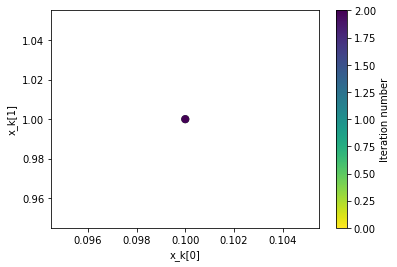

AttributeError: 'int' object has no attribute 'round'

In [4]:
eta =2/31.9
x0 = np.array([0.1,1])
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))


In [ ]:
eta = 2/35
x0 = np.array([0.1,1])
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

In [ ]:
eta= 2/128
x0 = np.array([0.1,1])
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

## Using Newton's method
Next we will use Newton's method to see if convergence is faster. 
### Part c) Write the update equation to get $x_{k+1}$ from $x_{k}$. Assume that the stepsize used is $\eta$.

Write the update equation and fill in the Hessian function below:

In [5]:
def Hessian(x):
    '''Return Hessian at x'''
    H = np.array([[1, 0], [0, 1]]).astype('float') # Fill this in
    return H


### Newton's method in action
Suppose you start with $x_0 = [0.1,1]$. 
### Part d) Run Newton's method for the following stepsizes and compare the paths traced by $x_k$:
1. $\eta = 2.2$
2. $\eta =1$
3. $\eta = 0.5$


Describe what you see in each figure

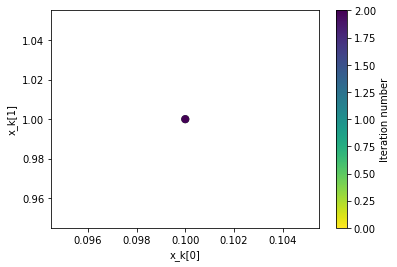

AttributeError: 'int' object has no attribute 'round'

In [6]:
x0 = np.array([0.1,1])
eta = 2.2
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

In [ ]:
x0 = np.array([0.1,1])
eta = 1.0
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

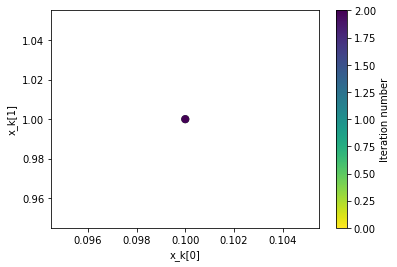

AttributeError: 'int' object has no attribute 'round'

In [7]:
x0 = np.array([0.1,1])
eta = 0.5
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### Part e) Compare the paths taken by gradient descent with stepsize 2/128 and Newton's method with stepsize 0.5

Use the visualize_comparison function to plot both gradient descent and Newton's method descent paths

Describe what you see in the figure

In [8]:
#  Fill this in:


## Minimizing a non-quadratic objective
Next we consider a problem that involves minimization of an objective function that is not quadratic,

\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) =  \frac{1}{2} \left (10x_1^2 + x_2^2 \right) +  5\log(1 + e^{-x_1 -x_2})
\end{aligned}

We can write the update equations for both gradient descent and Newton's method for this case using the same approach that we used for the previous case. 

Fill in the gradient and Hessian functions defined below:

In [9]:
def gradient2(x):
    '''Return gradient at x'''
    grad  = np.array([0, 0]).astype('float') # Fill this in 
    return grad



def Hessian2(x):
    '''Return Hessian at x'''
#     Fill this in:
    H_00 = 1
    H_11 = 1
    H_01 = 0
    H_10 = 0
    H = np.array([[H_00, H_01], [H_10, H_11]]).astype('float')
    return H

### Gradient Descent in action
Suppose you start with $x_0 = [-20,-20]$. 

### Part f) Run gradient descent using stepsize of 1/8 and plot the trajectory as well as optimal value 

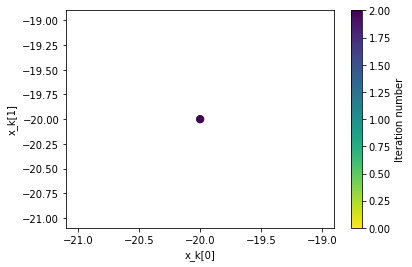

AttributeError: 'int' object has no attribute 'round'

In [10]:
eta= 1/8
x0 = np.array([-20,-20])
x_array, num_iters = gradient_descent(gradient2, x = x0, stepsize=eta, max_iters=1000)
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### Newton's method in action
Suppose you start with $x_0 = [20,20]$. 

### Part g) Run Newton's method using stepsize of 1 and 1/4 and plot the trajectory as well as optimal value 

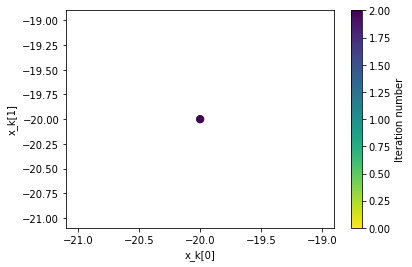

AttributeError: 'int' object has no attribute 'round'

In [11]:
x0 = np.array([-20,-20])
eta = 1.0
x_array, num_iters = Newton(gradient2, Hessian2, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

The algorithm converges in 5 iterations (and not 1 iteration) when using stepsize of 1.0. This is because the objective function is not a quadrratic.

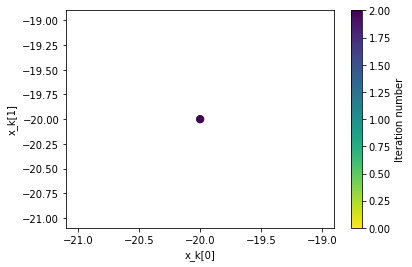

AttributeError: 'int' object has no attribute 'round'

In [12]:
x0 = np.array([-20,-20])
eta = 1.0/4.0
x_array, num_iters = Newton(gradient2, Hessian2, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### Part h) Compare the paths taken by gradient descent with stepsize 1/8 and Newton's method with stepsize 1/4

Use the visualize_comparison function to plot both gradient descent and Newton's method descent paths

Describe what you see in the figure

In [13]:
# Fill this in:


Feel free to play around with stepsizes for gradient descent and Newton's method in the cells above and see when things start to diverge and how the paths taken evolve as stepsize changes. 

## Minimizing a bi-quadratic objective
Next we consider a problem that involves minimization of an objective function that is bi-quadratic,

\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) = x_1^4 + x_2^4 
\end{aligned}

We can write the update equations for both gradient descent and Newton's method for this case using the same approach that we used for the previous case. 

Fill in the gradient and Hessian functions defined below:

In [14]:
def gradient4(x):
    '''Return gradient at x'''
    grad  = np.array([0, 0]).astype('float') # Fill this in
    return grad

def Hessian4(x):
    '''Return Hessian at x'''
#     Fill this in
    H_00 = 1
    H_11 = 1
    H_01 = 0
    H_10 = 0
    H = np.array([[H_00, H_01], [H_10, H_11]]).astype('float')
    return H

### Gradient Descent in action
Suppose you start with $x_0 = [10,20]$. 

### Part i) Run gradient descent using stepsize of 1/1000 and plot the trajectory as well as optimal value 

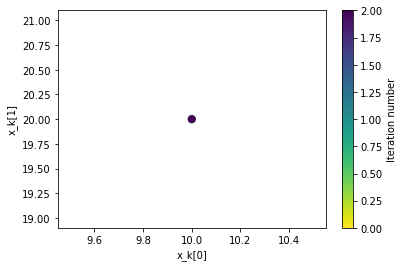

AttributeError: 'int' object has no attribute 'round'

In [15]:
eta= 1/1000
x0 = np.array([10,20])
x_array, num_iters = gradient_descent(gradient4, x = x0, stepsize=eta, max_iters=1000)
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

Try varying the step size. What happens when you increase step size by a factor of 10, or decrease it by a factor of 10?

### Newton's method in action
Suppose you start with $x_0 = [10,20]$. 

### Part j) Run Newton's method using stepsize of 1 and 1/4 and plot the trajectory as well as optimal value 

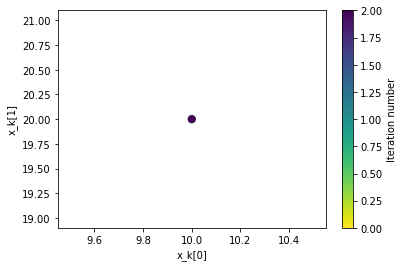

AttributeError: 'int' object has no attribute 'round'

In [16]:
x0 = np.array([10,20])
eta = 1
x_array, num_iters = Newton(gradient4, Hessian4, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

In [ ]:
x0 = np.array([10,20])
eta = 0.25
x_array, num_iters = Newton(gradient4, Hessian4, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### Part k) Compare the paths taken by gradient descent with stepsize 1/1000 and Newton's method with stepsize 1/4

Use the visualize_comparison function to plot both gradient descent and Newton's method descent paths

Describe what you see in the figure

In [17]:
# Fill this in



## Credit: Designed by Vignesh Subramanian
